In [2]:
from tkinter import *
from tkinter.filedialog import askopenfilename

root = Tk()
root.withdraw()
root.update()
file_path = askopenfilename()
root.destroy()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.tools as tls
import plotly.plotly as py


In [3]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values


In [4]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN',  strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])


In [5]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 124400.0],
       ['France', 35.0, 58000.0],
       ['Spain', 44.9, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0],
       ['France', 100.0, 670000.0]], dtype=object)

In [6]:
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder =  OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()


In [7]:
X

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.40000000e+01,   7.20000000e+04],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.70000000e+01,   4.80000000e+04],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          3.00000000e+01,   5.40000000e+04],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.80000000e+01,   6.10000000e+04],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          4.00000000e+01,   1.24400000e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.50000000e+01,   5.80000000e+04],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          4.49000000e+01,   5.20000000e+04],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.80000000e+01,   7.90000000e+04],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          5.00000000e+01,   8.30000000e+04],
       [  1.00000000e+00,   0.0000000

In [8]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


In [9]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0])

In [10]:
from sklearn.cross_validation import  train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2,  random_state = 42)


In [11]:
from sklearn.preprocessing import StandardScaler  
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)  
X_test = sc_X.transform(X_test)

In [12]:
X_train

array([[ 1.73205081, -0.77459667, -0.77459667,  2.47287889,  2.6276313 ],
       [-0.57735027,  1.29099445, -0.77459667, -0.80788912, -0.46384725],
       [-0.57735027, -0.77459667,  1.29099445, -0.94849347, -0.49395905],
       [-0.57735027,  1.29099445, -0.77459667,  0.12947317, -0.31830686],
       [-0.57735027,  1.29099445, -0.77459667, -0.33920798, -0.11053541],
       [ 1.73205081, -0.77459667, -0.77459667,  0.03573694, -0.3383814 ],
       [-0.57735027, -0.77459667,  1.29099445, -0.43294421, -0.42871681],
       [-0.57735027, -0.77459667,  1.29099445, -0.10955422, -0.47388452]])

In [13]:
X_test

array([[ 1.73205081, -0.77459667, -0.77459667, -0.57354855, -0.44377271],
       [ 1.73205081, -0.77459667, -0.77459667, -0.15173552, -0.37351184],
       [ 1.73205081, -0.77459667, -0.77459667, -0.47981232, -0.39860501]])

In [14]:
dataset.isnull()
dataset.isnull().sum()


Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [15]:
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

ax.boxplot(X)

ax.set_xlabel('Data Points')
ax.set_ylabel('Variance')


plotly_fig = tls.mpl_to_plotly( mpl_fig )
plot_url = py.plot(plotly_fig, filename='boxplot-basic')

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


{'boxes': [<matplotlib.lines.Line2D at 0x12cb30390>],
 'caps': [<matplotlib.lines.Line2D at 0x12cb35e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x12cb38f98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12cb38780>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12cb30da0>,
  <matplotlib.lines.Line2D at 0x12cb30eb8>]}

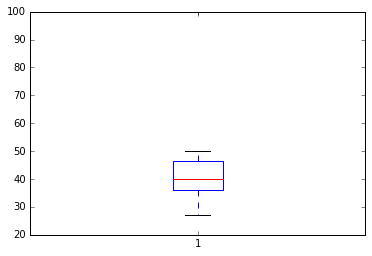

In [16]:
%matplotlib inline 
plt.boxplot(X[:,3])

<Container object of 11 artists>

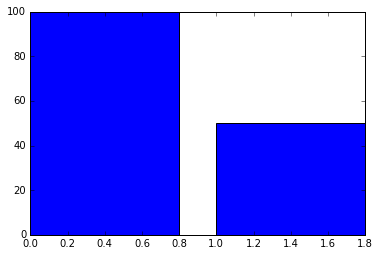

In [17]:
plt.bar(X[:,1], X[:,3])